# Prueba Intertrimestral

Nombre y Apellidos: Silvia García Lage

Tiempo de la prueba: 1h y 45 mins

Asignatura: Desarrollo de Aplicaciones para la Visualización de Datos

Fecha: 14 de octubre de 2024

Instrucciones:

- Herramientas Sugeridas: Python (pandas, matplotlib, seaborn, scikit-learn).

- Evaluación: Se valorará la capacidad para interpretar los resultados y la claridad en la exposición de las conclusiones.

- Materiales permitidos: Materiales de clase. Internet para búsqueda de dudas y documentación.

- Prohibido: Mingún tipo de LLM, ni mensajería instantánea.

- Formato de Entrega: Los estudiantes deben presentar su trabajo en formato de notebook (por ejemplo, Jupyter Notebook), con gráficos y explicaciones detalladas.

- Entrega: Subir .ipynb y PDF a Github. Enviar resultados al siguiente enlace. Para crear PDF: File -> Print -> Destination as PDF

## [Entrega aquí el examen](https://forms.gle/gU7aKkzE7didZpYV7)




Carga aquí las librerías que creas que vayas a utilizar:

In [83]:
import pandas as pd
import numpy as np
from datetime import date
import sys
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.graph_objects as go
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline

# Ejercicio 1: Programación (2 puntos)

a) Crea una función que calcule y devuelva el valor de la iteración $n+1$ del mapa logístico dada la fórmula:

$x_{n+1}=r⋅x_n⋅(1−x_n)$

donde:

- $r$ es la tasa de crecimiento
- $x_n$ es el valor de la iteración anterior.

La función debe aceptar como parámetros $r$ y $x_n$ (valor inicial). (0.6 puntos)


In [4]:
def mapaLogistico(r,xn):
    xn1 = r*xn*(1-xn)
    return xn1

In [5]:
mapaLogistico(2,3)

-12

b) Crea una función que genere una lista con las primeras n iteraciones del mapa logístico, utilizando la función anterior. (0.6 puntos)

In [26]:
def generaLista(r,n):
    lista = []
    xn=0
    for i in range(n):
        xn+=1
        iteracion = mapaLogistico(r,xn)
        lista.append(iteracion)
    return lista

In [27]:
generaLista(2,4)

[0, -4, -12, -24]

c) Guarda en un dataframe las iteraciones del mapa logístico, para $r = \{0, 0.25, 0.5, 0.75, \dots, 4\}$ y semilla $x_0 = 0.2$. El dataframe debe tener tres columnas: $r$, $n$ y $x_{n+1}$. Muestra los 10 primeros resultados (0.6 puntos)

In [46]:
lista_r = []
n_lista = []
xn1_lista = []
xn = 0.2
con = 0
c = 0
for i in range(16):
    con+=0.25
    c+=1
    lista_r.append(con)
    n_lista.append(c)
    xn1 = mapaLogistico(con,xn)
    xn1_lista.append(xn1)
    xn = xn1

df = pd.DataFrame(data = [lista_r,n_lista,xn1_lista],columns = ['r','n','xn+1'])

ValueError: 3 columns passed, passed data had 16 columns

d) ¿Cómo se podría programar en una clase las dos funciones anteriores para calcular y almacenar iteraciones del mapa logístico? Proporciona la implementación de la clase con un método para obtener el valor de una iteración específica, otro método para generar la lista completa de iteraciones y otro para crear un gráfico que visualice el $r$ y $x_{n+1}$. (0.2 puntos)

# Ejercicio 2: Exploración y comprensión (3 puntos)

a) Describe las principales variables del dataset proporcionado. ¿Qué información aportan y qué tipo de datos contiene cada una? ¿Existen valores faltantes en el dataset? Si es así, ¿en qué variables? ¿Qué propones para resolverlo? (1 puntos)


In [51]:
df = pd.read_csv("Walmart.csv")
# Tipos de las columnas
print("*******************************************************")
print('TIPOS DE LAS COLUMNAS')
print("*******************************************************")
print(df.dtypes)

# Comprobar el número de NAs
print("*******************************************************")
print('NÚMERO DE NAS')
print("*******************************************************")
print(df.isna().sum())

# Eliminar filas con NAs
df_cleaned = df.dropna()

print("*******************************************************")
print("DATASET SIN NAS")
print("*******************************************************")
df_cleaned.isna().sum()

*******************************************************
TIPOS DE LAS COLUMNAS
*******************************************************
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object
*******************************************************
NÚMERO DE NAS
*******************************************************
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    1
dtype: int64
*******************************************************
DATASET SIN NAS
*******************************************************


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

b) Realiza un gráfico de barras que responda las siguientes preguntas. ¿Cuántas tiendas $Store$ están presentes en el dataset? ¿Cuál es la media de ventas semanales $Weekly Sales$ por tienda? ¿Qué tiendas tienen las ventas promedio más altas y más bajas? (1 puntos)



45


In [78]:
#Número de tiendas Store presentes en el dataset
stores = []
for i in df_cleaned['Store']:
    if i not in stores:
        stores.append(i)
n_stores = len(stores)

#Media de ventas semanales por tienda
media = df_cleaned.groupby('Store')["Weekly_Sales"].mean()

#Tiendas con con ventas promedio más altas y más bajas

grouped = pd.DataFrame(media)
plt.figure(figsize = (14,8))
sns.barplot(data = grouped, x = "Store", y = "Weekly_Sales", estimator = np.median)
plt.show()

ValueError: Could not interpret input 'Store'

<Figure size 1400x800 with 0 Axes>

c) Genera un gráfico de líneas que muestre la evolución de las ventas semanales $Weekly Sales$ a lo largo del tiempo para la tienda con más ventas totales. ¿Observas algún patrón estacional o tendencia? (1 puntos)

# Ejrcicio 3: Análisis de Factores Externos (2 puntos)

a) Explora la relación entre el precio de combustible $Fuel Price$, la tasa de desempleo $Unemployment$ y las ventas semanales $Weekly Sales$. ¿Existe alguna correlación significativa? Genera dos gráficos de dispersión (scatter plot) para ilustrarlo. (1 puntos)

In [96]:
df2 = df_cleaned.drop("Store", axis=1)
df3 = df2.drop("Date", axis=1)
df4 = df3.drop("Holiday_Flag", axis=1)
df5 = df4.drop("Temperature", axis=1)
df6 = df5.drop("CPI", axis=1)
df7 = df6.drop("target", axis=1)

print(df7.corr())
px.imshow(df7.corr())

              Weekly_Sales  Fuel_Price  Unemployment
Weekly_Sales      1.000000    0.009586     -0.106148
Fuel_Price        0.009586    1.000000     -0.034762
Unemployment     -0.106148   -0.034762      1.000000


C:\Users\silvi\AppData\Local\Temp\ipykernel_26024\3432865750.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



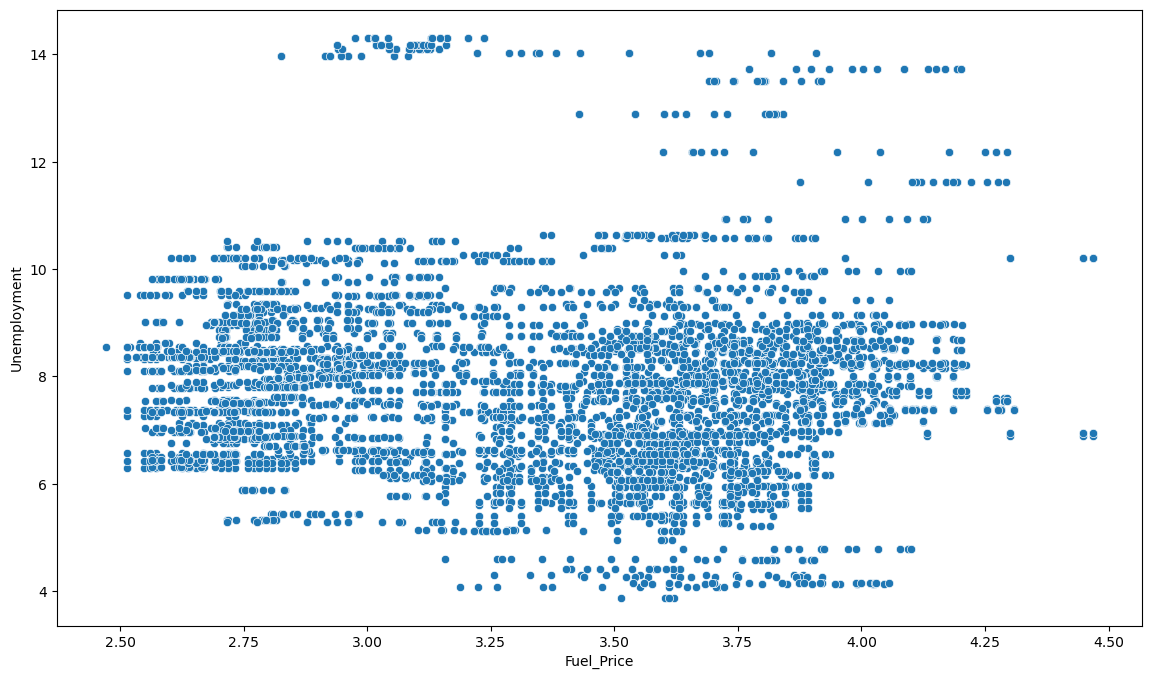

In [98]:
plt.figure(figsize= (14,8))
sns.scatterplot(data = df_cleaned, 
                x = "Fuel_Price", 
                y = "Unemployment",
                hue = ''
                palette = {"Fuel_Price": "red", "Unemployment": "blue", "Weekly_Sales": "green"})
plt.show()

c) Compara las ventas promedio de las semanas festivas $Holiday Flag = 1$ con las semanas no festivas $Holiday Flag = 0$. ¿Cuál es la diferencia promedio de ventas entre estos dos tipos de semanas? ¿Existe una diferencia estdísticamente significativa? (1 puntos)


# Ejercicio 4: Modelado predictivo (2 puntos)

a) Encuentra el mejor modelo de regresión lineal para predecir las ventas semanales $Weekly Sales$ en función de las variables disponibles. Prueba múltiples combinaciones de variables. (1.5 puntos)


In [86]:
df_cleaned["target"] = df_cleaned['Weekly_Sales']

# Dividir los datos en variables independientes (X) y dependientes (y)
X = df_cleaned.drop('Weekly_Sales', axis=1)  # Variables independientes
y = df_cleaned['Weekly_Sales']               # Variable dependiente (WeeklySales)

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir un modelo de Regresión Lineal
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predicciones con el modelo de Regresión Lineal
y_pred_linear = linear_reg.predict(X_test)

C:\Users\silvi\AppData\Local\Temp\ipykernel_26024\465462063.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ValueError: could not convert string to float: '17-09-2010'

b) Compara los modelos evalúando el R² y el error cuadrático medio (MSE). ¿Cuál es el modelo con mejores métricas? (0.5 puntos)


In [ ]:
# Evaluar el modelo de Regresión Lineal
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

# Ejercicio 5: Conclusiones y Recomendaciones (1 punto)

a) Redacta un informe de máximo 500 palabras resumiendo los principales hallazgos del análisis de datos y la modelización. Incluye tus conclusiones sobre qué factores influyen más en las ventas y recomendaciones para la empresa basadas en el análisis.